# 5. Gradient, Clip, Mask

In [1]:
import draw2Svg as dw

## Linear Gradient
```
gradient = dw.LinearGradient(x1, y1, x2, y2, gradientUnits='userSpaceOnUse', **kwargs)
gradient.addStop(offset, color, opacity=None)
```


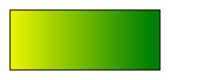

In [4]:
d = dw.Drawing(200,80,idPrefix='grad1')
grad = dw.LinearGradient(150,0,0,0)
grad.addStop(0,'green')
grad.addStop(1,'yellow')
d.append(dw.Rectangle(10,10,150,60,stroke='black',fill=grad))
#d.saveSvg('05_lingrad.svg')
d

## Radial Gradient
```
gradient = dw.RadialGradient(cx, cy, r, **kwargs)
gradient.addStop(offset, color, opacity=None)
```

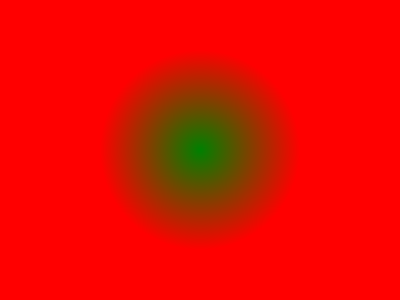

In [5]:
d = dw.Drawing(400, 300, idPrefix='grad2')
gradient = dw.RadialGradient(200,150,100)
gradient.addStop(0, 'green', 1)
gradient.addStop(1, 'red', 1)
bg = dw.Rectangle(x=0,y=0,width="100%",height="100%",fill=gradient)
d.append(bg)
#d.saveSvg('05_radgrad.svg')
d

## Clip

```
clip_name = dw.ClipPath()
```

To add shape as Clip, use `.append()` method.
To apply Clip, fill `clip_path` argument with `clip_name`.

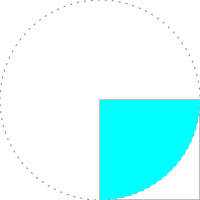

In [22]:
d = dw.Drawing(200, 200, idPrefix='clip')
# show both shapes as they are
d.append(dw.Rectangle(100,100,100,100,stroke='gray',fill='none'))
d.append(dw.Circle(100,100,100,fill='none',stroke='gray',stroke_dasharray='2,5'))
# apply rect as clip to circle
clip = dw.ClipPath()
clip.append(dw.Rectangle(100,100,100,100))
d.append(dw.Circle(100,100,100,fill="cyan",clip_path=clip))
#d.saveSvg('05_clip.svg')
d

Another example:

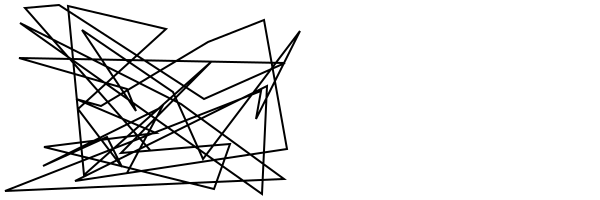

In [21]:
d = dw.Drawing(600,200,idPrefix='clip2')

# draw a random path in the left half of the canvas
p = dw.Path(stroke='black',stroke_width=2,fill='none')
p.M(150,150)
from random import randint
for i in range(40):
    p.L(randint(0,300),randint(0,200))
d.append(p)

# circle as clipping shape
circ = dw.Circle(150,100,75)
c = dw.ClipPath()
c.append(circ)

# repeat lines in the right half and apply clipping
d.append(dw.Use(p,300,0,clip_path=c))

#d.saveSvg('05_clip2.svg')
d

Complex clip path:

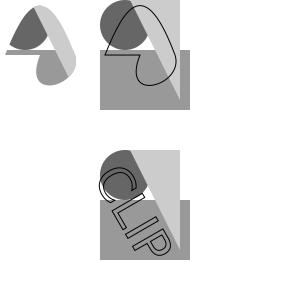

In [23]:
d = dw.Drawing(300,300,idPrefix='clip3')
curve1 = dw.Path(stroke='black',fill='none')
curve1.M(5,55).C(25,5, 45,-25, 75,55).C(85,85, 20,105, 40,55).Z()

curveClip = dw.ClipPath()
curveClip.append(curve1)

text1 = dw.Text('CLIP',48,20,20,stroke='black',fill='none',transform='rotate(60)')
textClip = dw.ClipPath()
textClip.append(text1)

shapes = dw.Group()
shapes.append(dw.Rectangle(0,50,90,60,fill='#999'))
shapes.append(dw.Circle(25,25,25,fill='#666'))
shapes.append(dw.Lines(30,0,80,0,80,100,close='true',fill='#ccc'))

# draw shapes with clip path
d.append(dw.Use(shapes,0,0,clip_path=curveClip))

# show clip path
g = dw.Group(transform='translate(100,0)')
g.append(shapes)
g.append(curve1)
d.append(g)

# draw shapes with text as clip path
d.append(dw.Use(shapes,0,150,clip_path=textClip))

# show text clip path
g = dw.Group(transform='translate(100,150)')
g.append(shapes)
g.append(text1)
d.append(g)
#d.saveSvg('05_clip3.svg')
d

## Mask
```
mask_name = dw.Mask()
```

The transparency of the masking object is transfered to the masked object.
Opaque pixels of the mask produce opaque pixels of the masked object.
Transparent parts of the mask make the corresponding parts of the masked object
invisible.


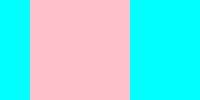

In [24]:
d = dw.Drawing(200, 100, idPrefix='mask1')

gradient = dw.LinearGradient(*[0,0],*[1,0], gradientUnits='objectBoundingBox')
gradient.addStop(0, 'white')
gradient.addStop(1, 'black')

mask = dw.Mask()
box = dw.Rectangle(
    x=30,y=0,
    width=100,height=100,
    fill=gradient)
mask.append(box)

#initial shape
rect = dw.Rectangle(
        x=0,y=0,
        width=200,height=100,
        fill="cyan",)
d.append(rect)

#After Mask
rect = dw.Rectangle(
        x=0,y=0,
        width=200,height=100,
        fill="pink", mask=mask)
d.append(rect)

#d.saveSvg('05_mask.svg')
d

Mask using opaque colors:

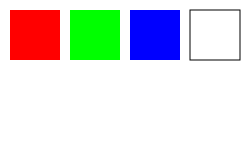

In [25]:
d = dw.Drawing(250,150,idPrefix='mask2')

# define the masks
redmask = dw.Mask(maskContentUnits='objectBoundingBox')
redmask.append(dw.Rectangle(0,0,1,1,fill='#f00'))
greenmask = dw.Mask(maskContentUnits='objectBoundingBox')
greenmask.append(dw.Rectangle(0,0,1,1,fill='#0f0'))
bluemask = dw.Mask(maskContentUnits='objectBoundingBox')
bluemask.append(dw.Rectangle(0,0,1,1,fill='#00f'))
whitemask = dw.Mask(maskContentUnits='objectBoundingBox')
whitemask.append(dw.Rectangle(0,0,1,1,fill='#fff'))

# display the colors
d.append(dw.Rectangle(10,10,50,50,fill='#f00'))
d.append(dw.Rectangle(70,10,50,50,fill='#0f0'))
d.append(dw.Rectangle(130,10,50,50,fill='#00f'))
d.append(dw.Rectangle(190,10,50,50,fill='#fff',stroke='black'))

# mask
g = dw.Group(mask=redmask)
g.append(dw.Circle(35,115,25,fill='black'))
g.append(dw.Text('Red',14,35,80,text_anchor='middle'))
d.append(g)
g = dw.Group(mask=greenmask)
g.append(dw.Circle(95,115,25,fill='black'))
g.append(dw.Text('Green',14,95,80,text_anchor='middle'))
d.append(g)
g = dw.Group(mask=bluemask)
g.append(dw.Circle(155,115,25,fill='black'))
g.append(dw.Text('Blue',14,155,80,text_anchor='middle'))
d.append(g)
g = dw.Group(mask=whitemask)
g.append(dw.Circle(215,115,25,fill='black'))
g.append(dw.Text('White',14,215,80,text_anchor='middle'))
d.append(g)

#d.saveSvg('05_mask2.svg')
d

Mask alpha using opacity only:

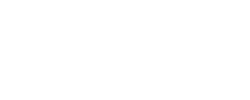

In [26]:
d = dw.Drawing(250,100,idPrefix='mask3')
fullmask = dw.Mask(maskContentUnits='objectBoundingBox')
fullmask.append(dw.Rectangle(0,0,1,1,fill_opacity=1.0,fill='white'))
three_fourths = dw.Mask(maskContentUnits='objectBoundingBox')
three_fourths.append(dw.Rectangle(0,0,1,1,fill_opacity=0.75,fill='white'))
one_half = dw.Mask(maskContentUnits='objectBoundingBox')
one_half.append(dw.Rectangle(0,0,1,1,fill_opacity=0.5,fill='white'))
one_fourth = dw.Mask(maskContentUnits='objectBoundingBox')
one_fourth.append(dw.Rectangle(0,0,1,1,fill_opacity=0.25,fill='white'))

g = dw.Group(mask=fullmask)
g.append(dw.Circle(35,35,25))
g.append(dw.Text('100%',14,35,80,text_anchor='middle'))
d.append(g)
g = dw.Group(mask=three_fourths)
g.append(dw.Circle(95,35,25))
g.append(dw.Text('50%',14,95,80,text_anchor='middle'))
d.append(g)
g = dw.Group(mask=one_half)
g.append(dw.Circle(155,35,25))
g.append(dw.Text('50%',14,155,80,text_anchor='middle'))
d.append(g)
g = dw.Group(mask=one_fourth)
g.append(dw.Circle(215,35,25))
g.append(dw.Text('25%',14,215,80,text_anchor='middle'))
d.append(g)

#d.saveSvg('05_mask3.svg')
d